# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#Type your code here
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import ipaddress
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from google.colab import drive
%matplotlib inline
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
#Type your code here
path = kagglehub.dataset_download("datascientistanna/customers-dataset")

print("Path to dataset files:", path)

# Cari file CSV di dalam folder
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        print("Dataset ditemukan:", csv_file)

        # Load dataset ke dalam DataFrame pandas
        df = pd.read_csv(csv_file)
        print("Dataset berhasil dimuat!")
        display(df.head())
        break

Path to dataset files: /root/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1
Dataset ditemukan: /root/.cache/kagglehub/datasets/datascientistanna/customers-dataset/versions/1/Customers.csv
Dataset berhasil dimuat!


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#Type your code here
print("=== describe ===")
display(df.describe(include='all'))
print("\n\n=== info ===")
display(df.info())
print("\n\n=== duplikasi ===")
display(df.duplicated().sum())
print("\n\n=== null ===")
display( df.isnull().sum())

=== describe ===


,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,1965,2000.000000,2000.000000
unique,NaN,2,NaN,NaN,NaN,9,NaN,NaN
top,NaN,Female,NaN,NaN,NaN,Artist,NaN,NaN
freq,NaN,1186,NaN,NaN,NaN,612,NaN,NaN
mean,1000.500000,NaN,48.960000,110731.821500,50.962500,NaN,4.102500,3.768500
std,577.494589,NaN,28.429747,45739.536688,27.934661,NaN,3.922204,1.970749
min,1.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,500.750000,NaN,25.000000,74572.000000,28.000000,NaN,1.000000,2.000000
50%,1000.500000,NaN,48.000000,110045.000000,50.000000,NaN,3.000000,4.000000
75%,1500.250000,NaN,73.000000,149092.750000,75.000000,NaN,7.000000,5.000000




=== info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


None



=== duplikasi ===


0



=== null ===


,0
CustomerID,0
Gender,0
Age,0
Annual Income ($),0
Spending Score (1-100),0
Profession,35
Work Experience,0
Family Size,0


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
  if col in df.columns:
    print(f"\n{col} ditemukan.")
    print(df[col].describe())
    print(f"Nilai negatif di kolom {col}: {len(df[df[col] < 0])}")
  else:
    print(f"WARNING: Kolom {col} TIDAK ditemukan di dataset.")


CustomerID ditemukan.
count    2000.000000
mean     1000.500000
std       577.494589
min         1.000000
25%       500.750000
50%      1000.500000
75%      1500.250000
max      2000.000000
Name: CustomerID, dtype: float64
Nilai negatif di kolom CustomerID: 0

Age ditemukan.
count    2000.000000
mean       48.960000
std        28.429747
min         0.000000
25%        25.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: Age, dtype: float64
Nilai negatif di kolom Age: 0

Annual Income ($) ditemukan.
count      2000.000000
mean     110731.821500
std       45739.536688
min           0.000000
25%       74572.000000
50%      110045.000000
75%      149092.750000
max      189974.000000
Name: Annual Income ($), dtype: float64
Nilai negatif di kolom Annual Income ($): 0

Spending Score (1-100) ditemukan.
count    2000.000000
mean       50.962500
std        27.934661
min         0.000000
25%        28.000000
50%        50.000000
75%        75.000000
max       100.00000

In [ ]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
for col in categorical_cols:
  if col in df.columns:
    print(f"\n{col} ditemukan.")
    print("Nilai unik dalam kolom ini")
    print(df[col].unique())
    print(f"Jumlah nilai unik dalam kolom {col}: {df[col].nunique()}")
  else:
    print(f"WARNING: Kolom {col} TIDAK ditemukan di dataset.")


Gender ditemukan.
Nilai unik dalam kolom ini
['Male' 'Female']
Jumlah nilai unik dalam kolom Gender: 2

Profession ditemukan.
Nilai unik dalam kolom ini
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Jumlah nilai unik dalam kolom Profession: 9


        CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.00

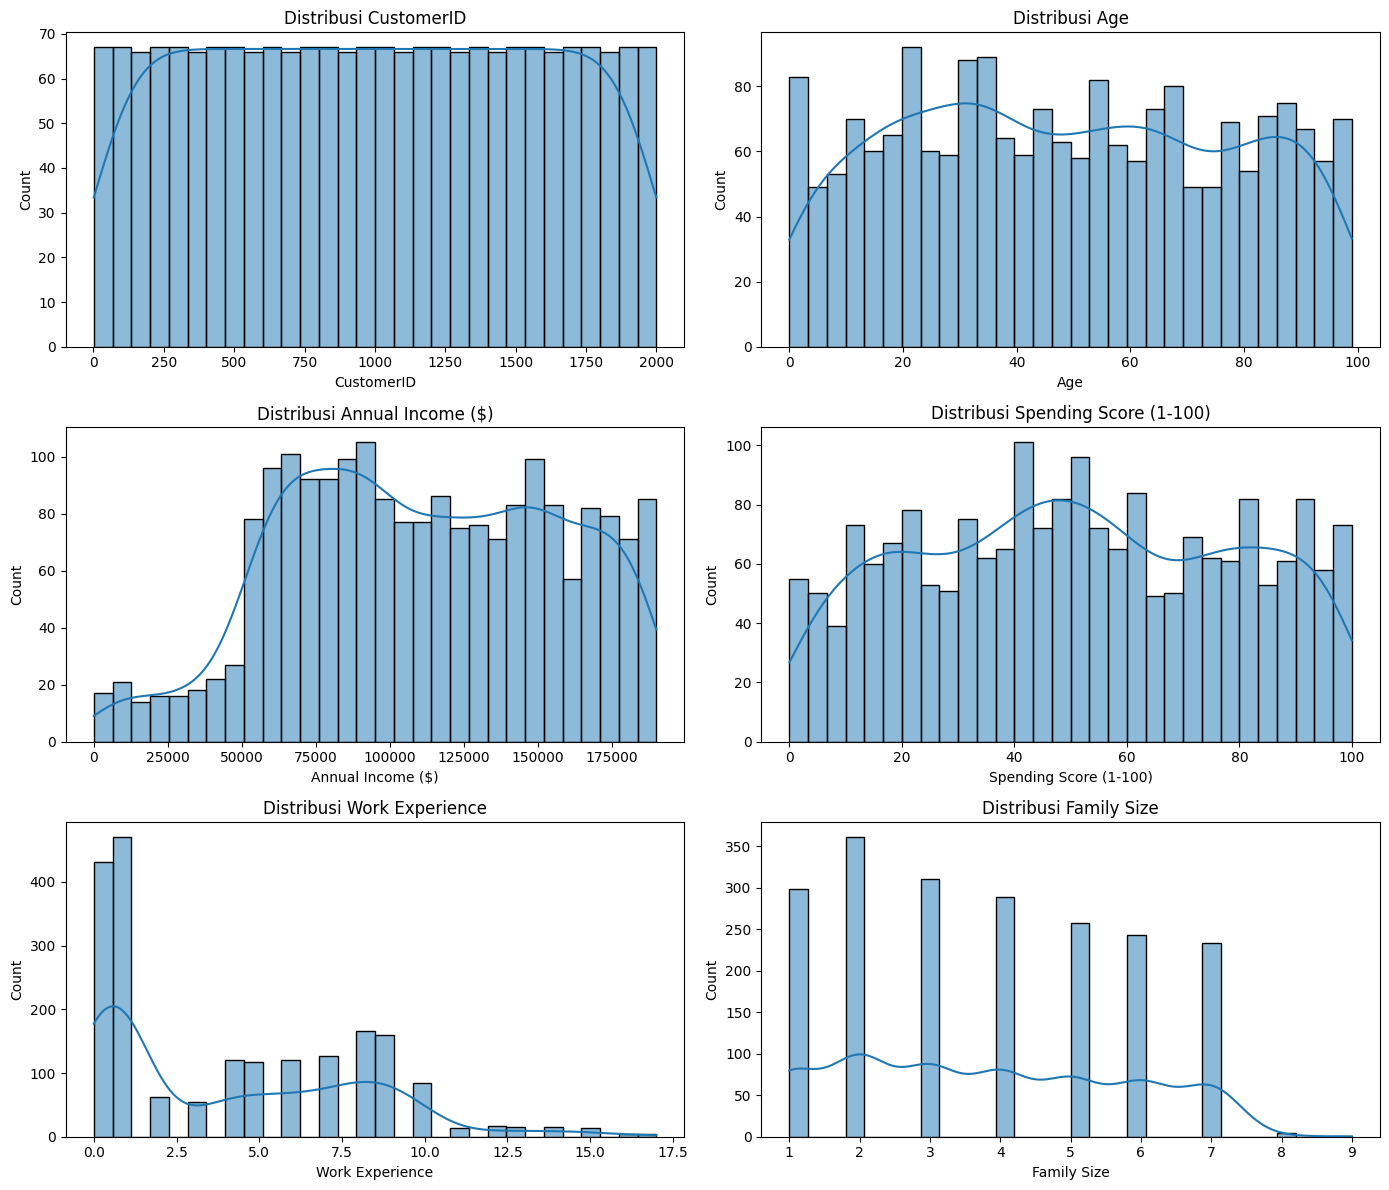

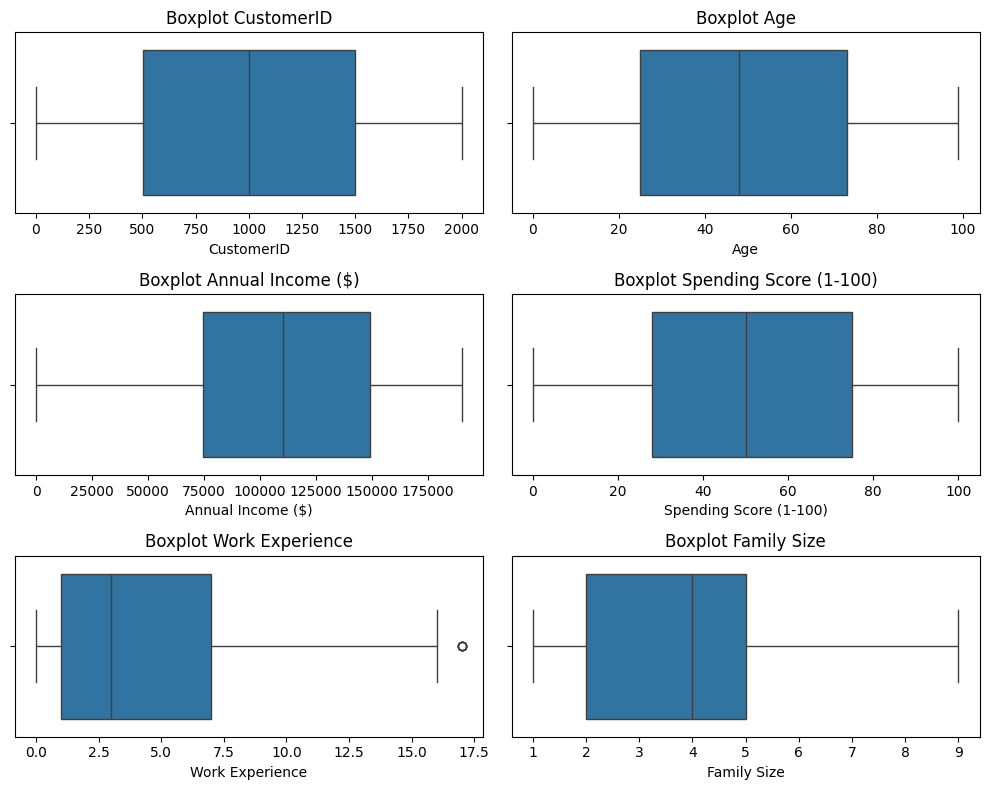

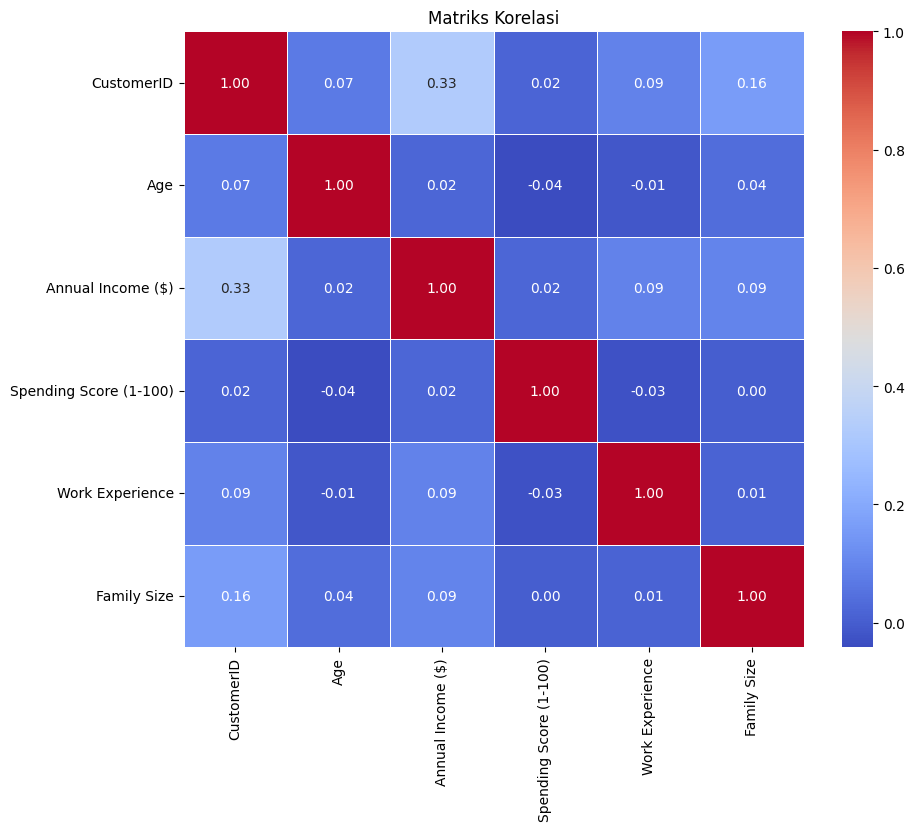

<Figure size 1000x800 with 0 Axes>

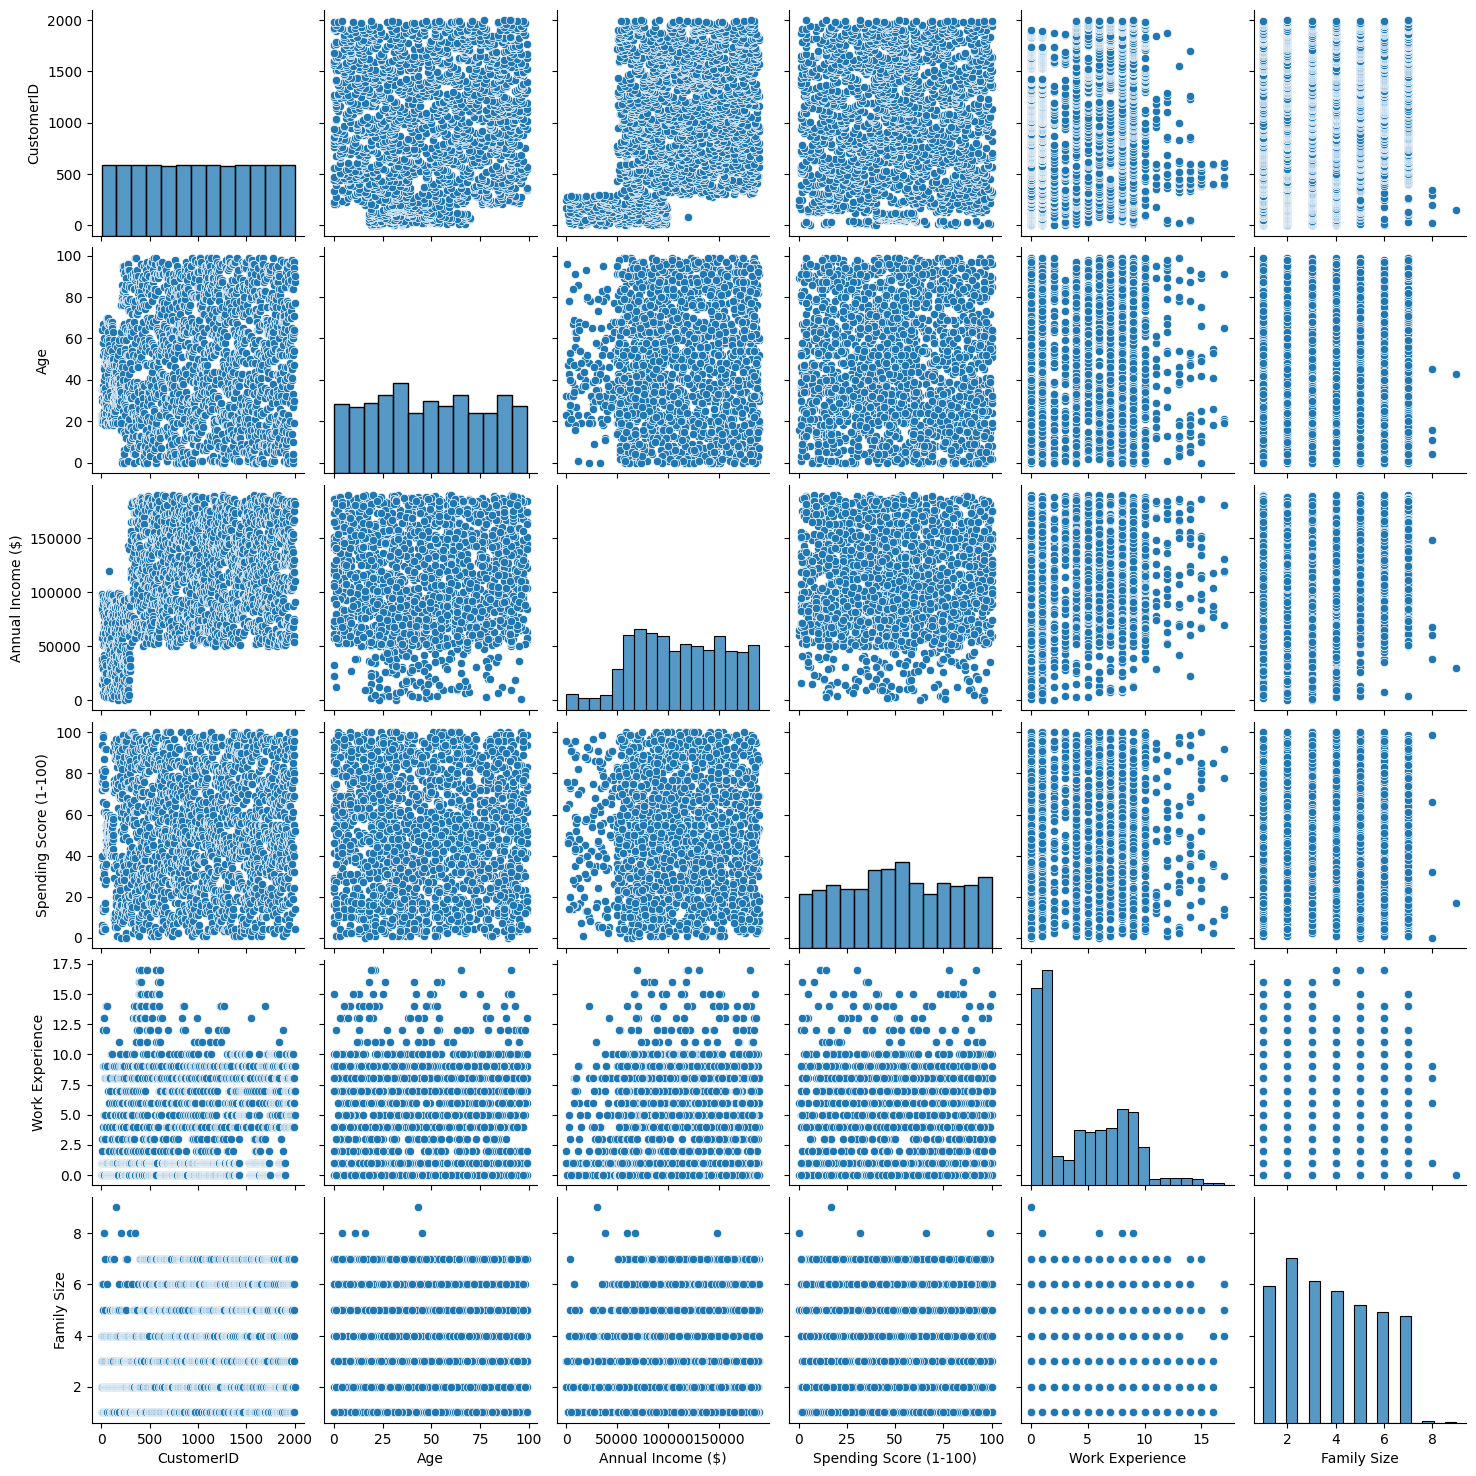

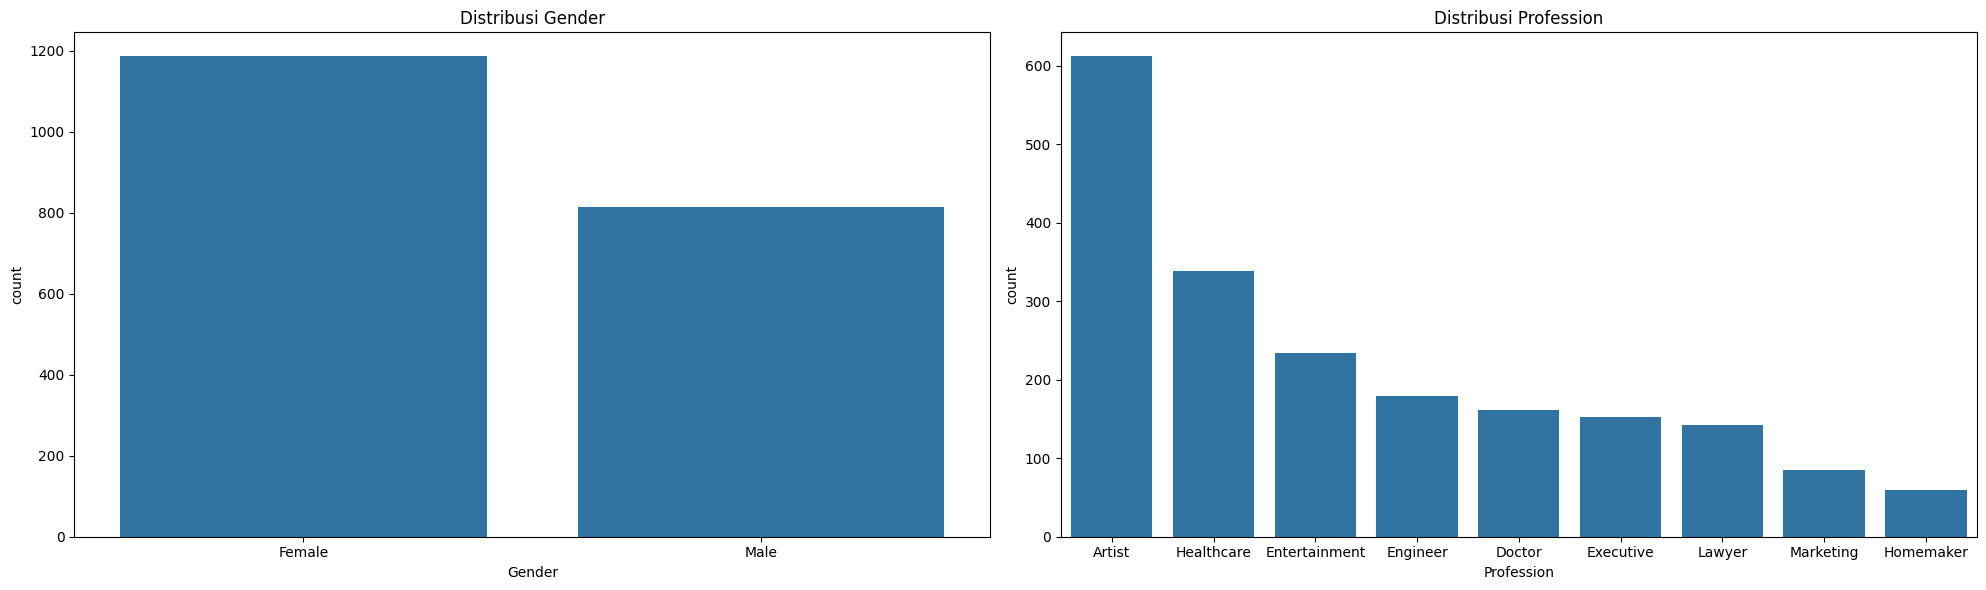

In [ ]:
# Analisis Statistik Deskriptif
print(df[numeric_cols].describe())
n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Visualisasi Histogram untuk setiap kolom numerik
plt.figure(figsize=(14, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Visualisasi Boxplot untuk setiap kolom numerik
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Matriks Korelasi dan Heatmap
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

# Scatter plot (pairplot)
plt.figure(figsize=(10, 8))
sns.pairplot(df[numeric_cols])
plt.show()

# Visualisasi Distribusi Variabel Kategorikal
plt.figure(figsize=(20, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


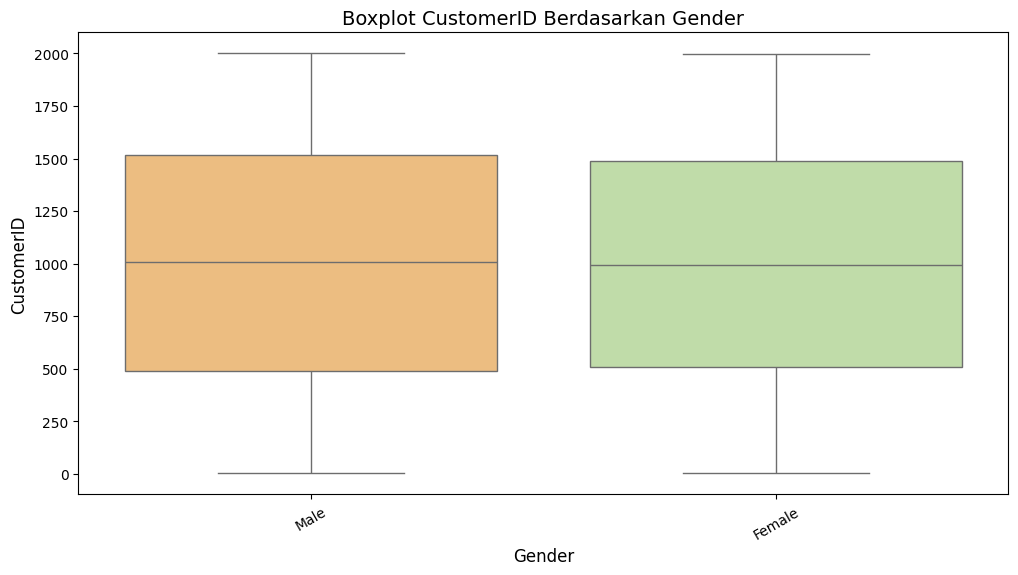

<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


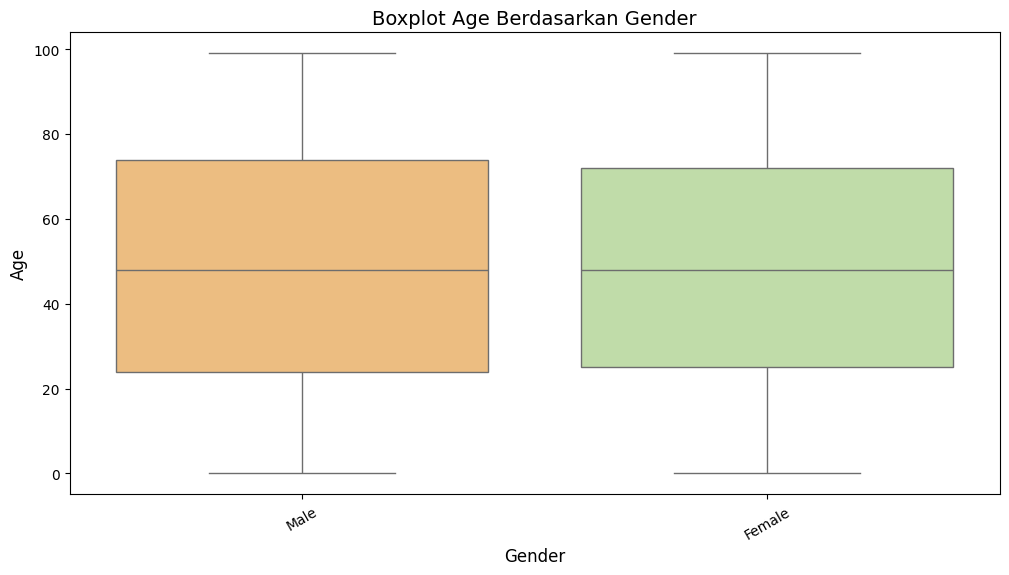

<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


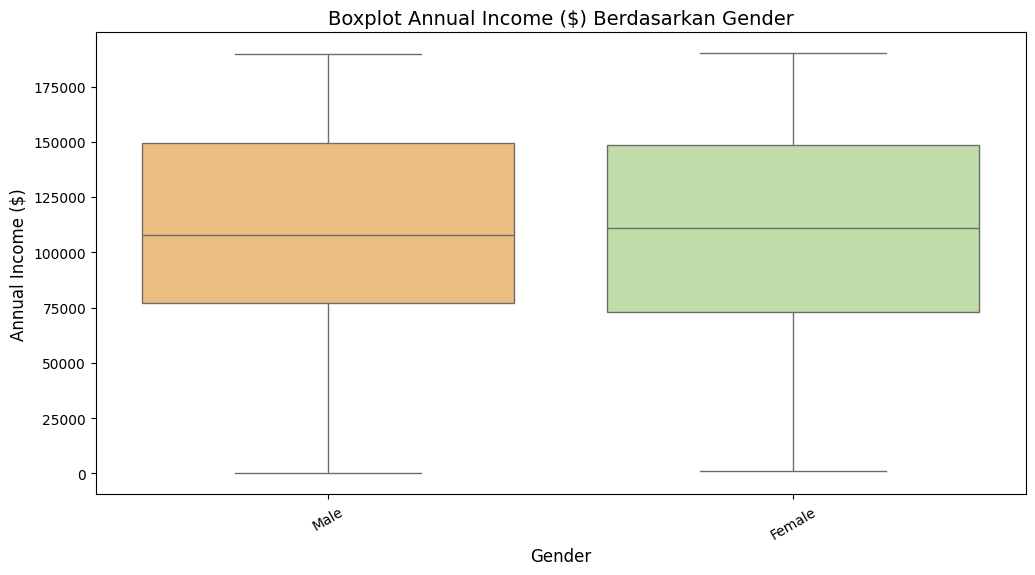

<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


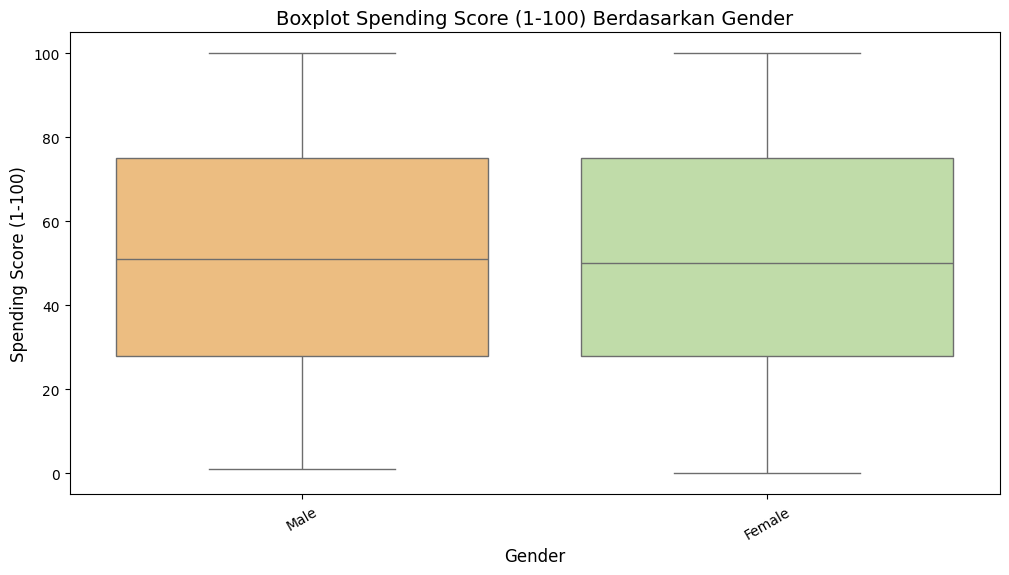

<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


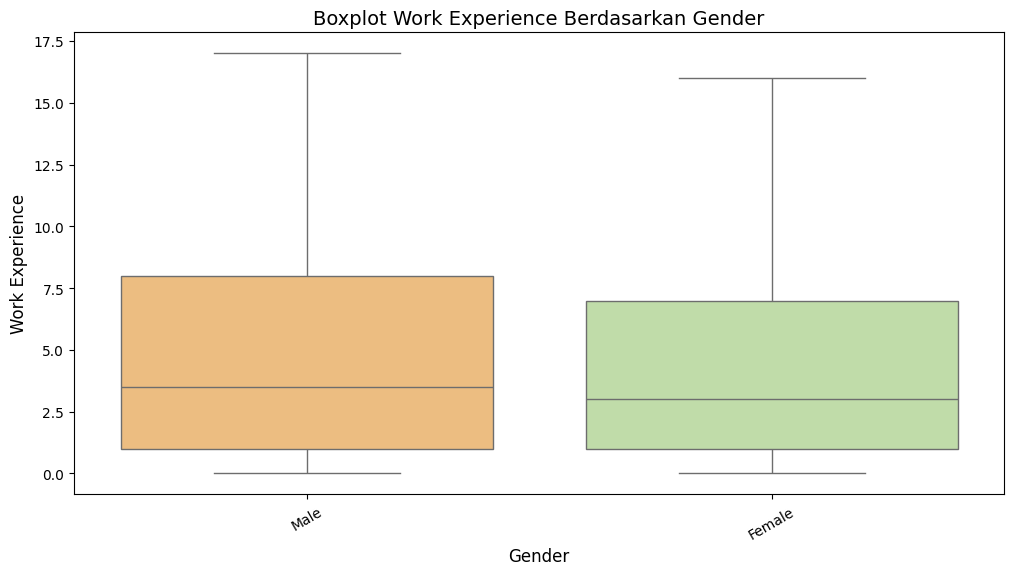

<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


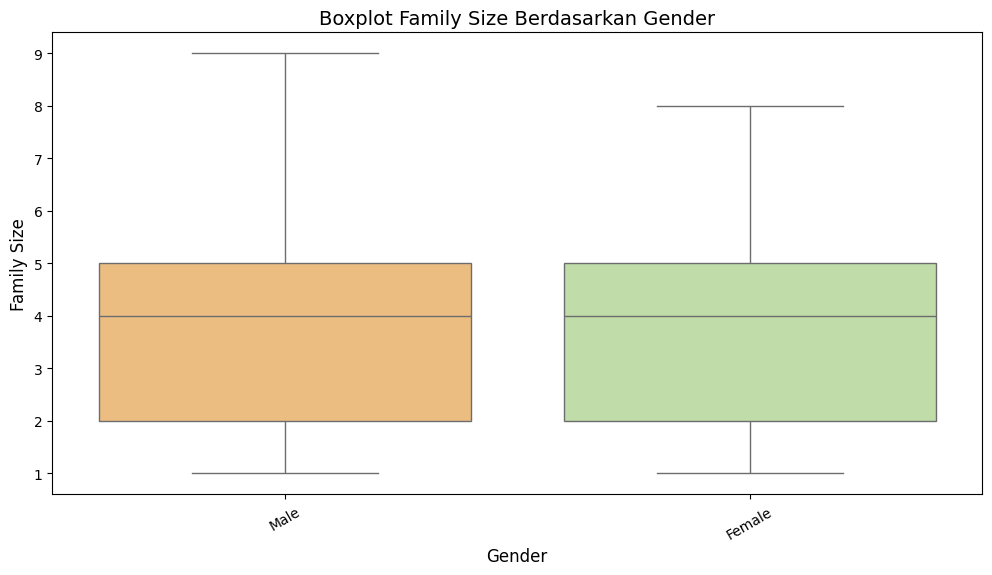

<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


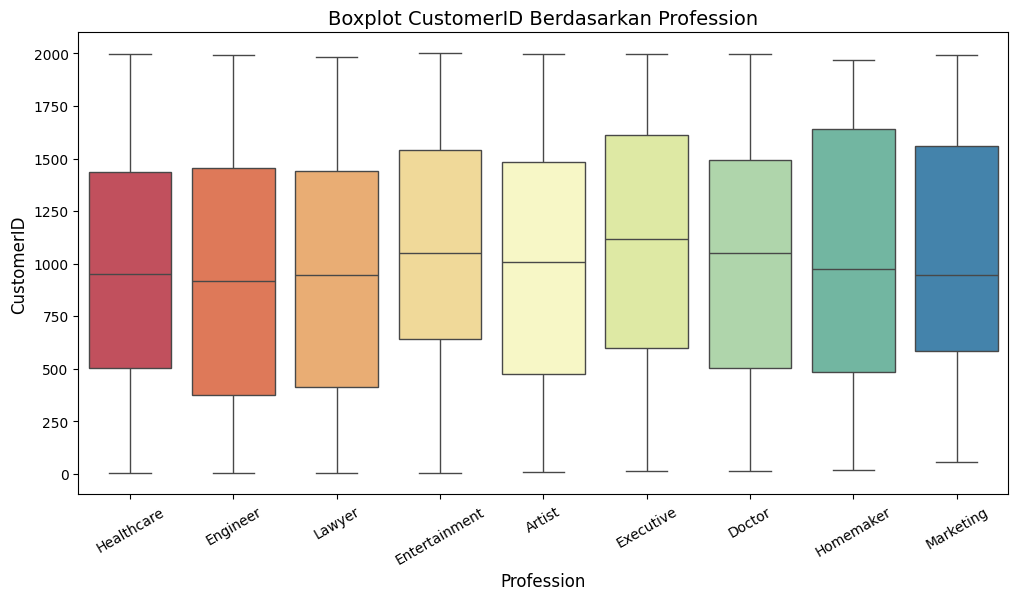

<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


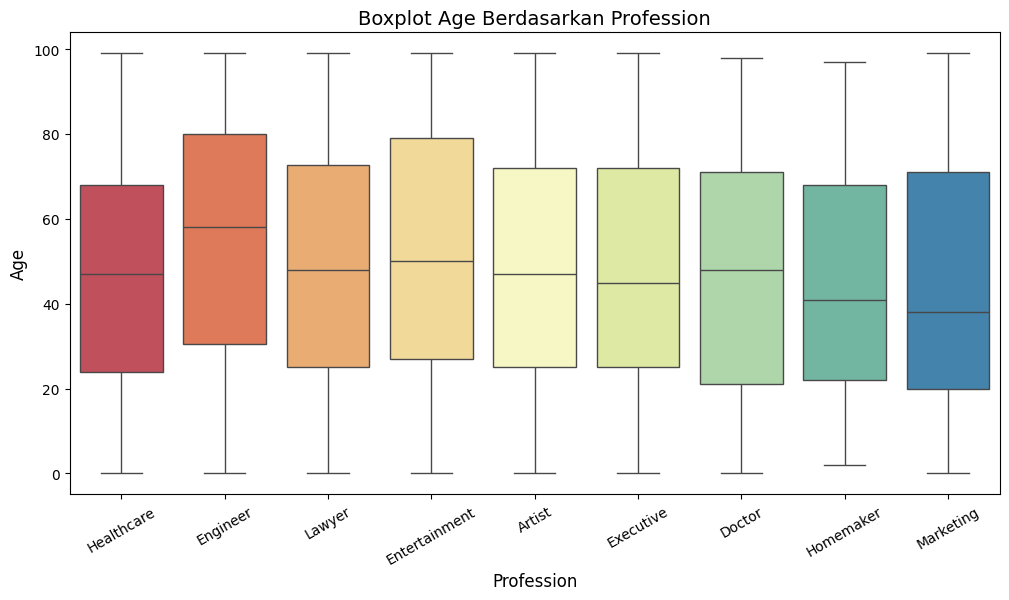

<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


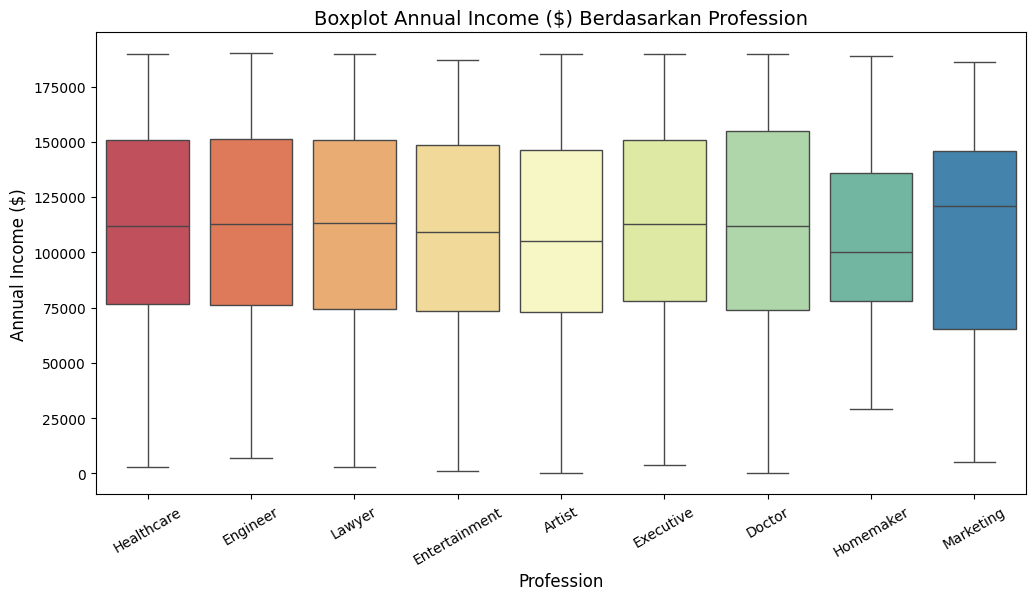

<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


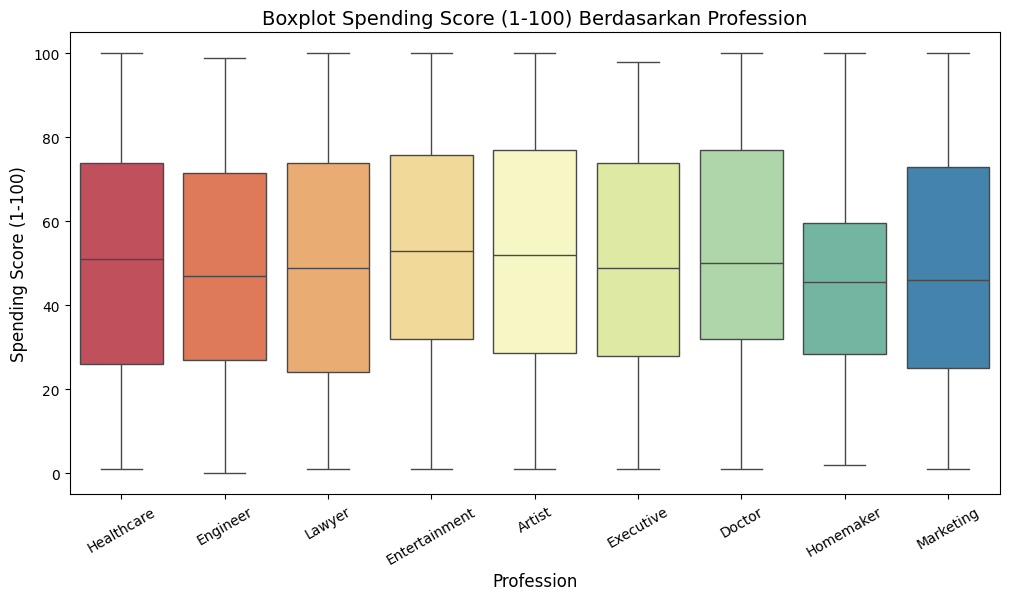

<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


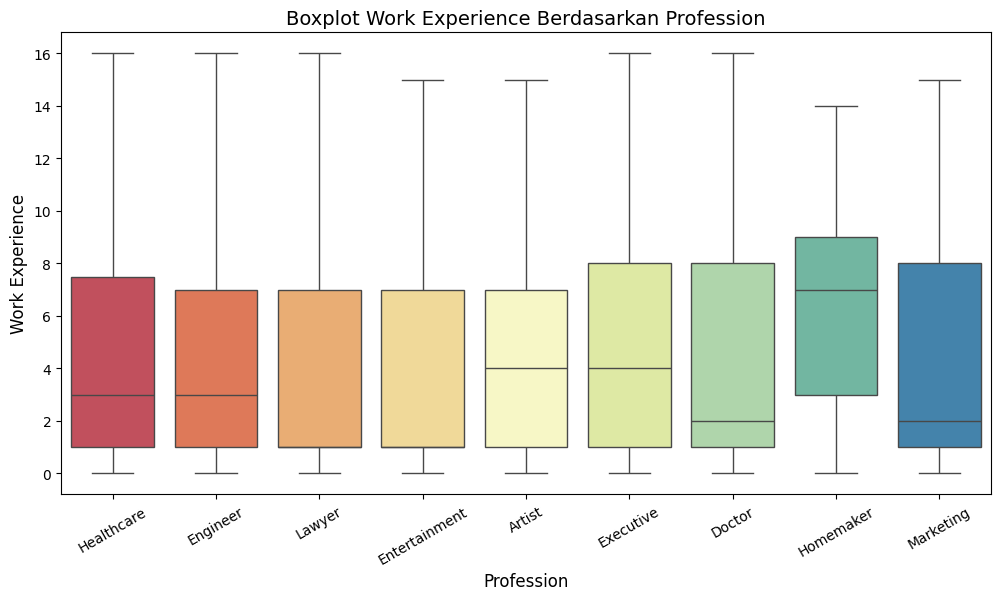

<ipython-input-56-a9797338e5cc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)


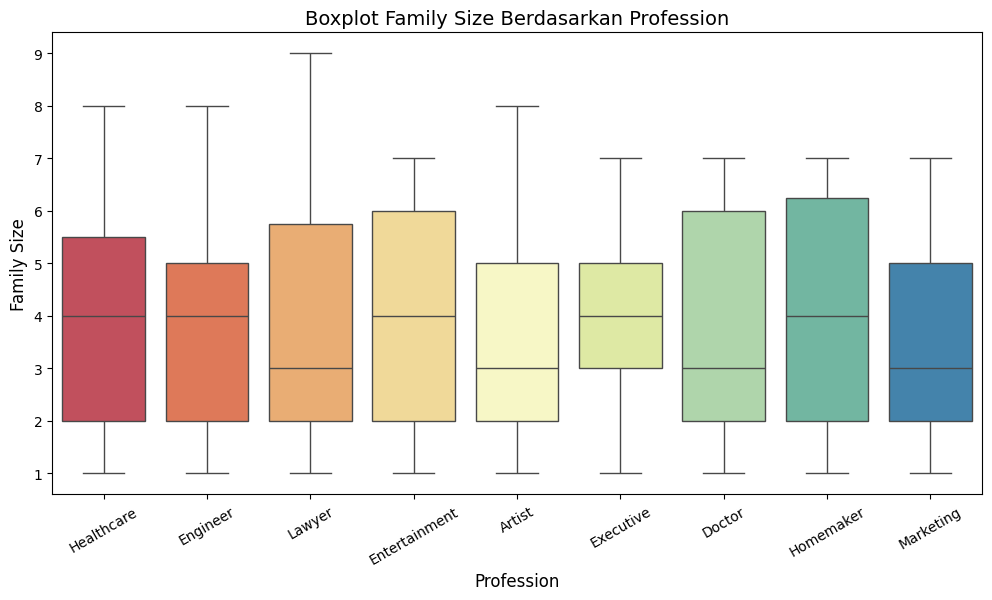

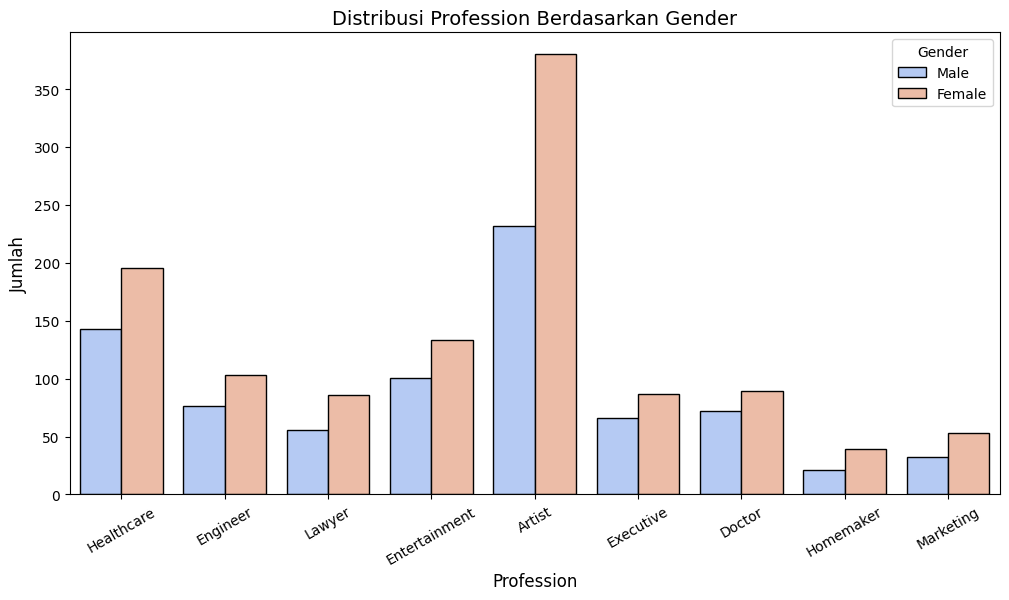

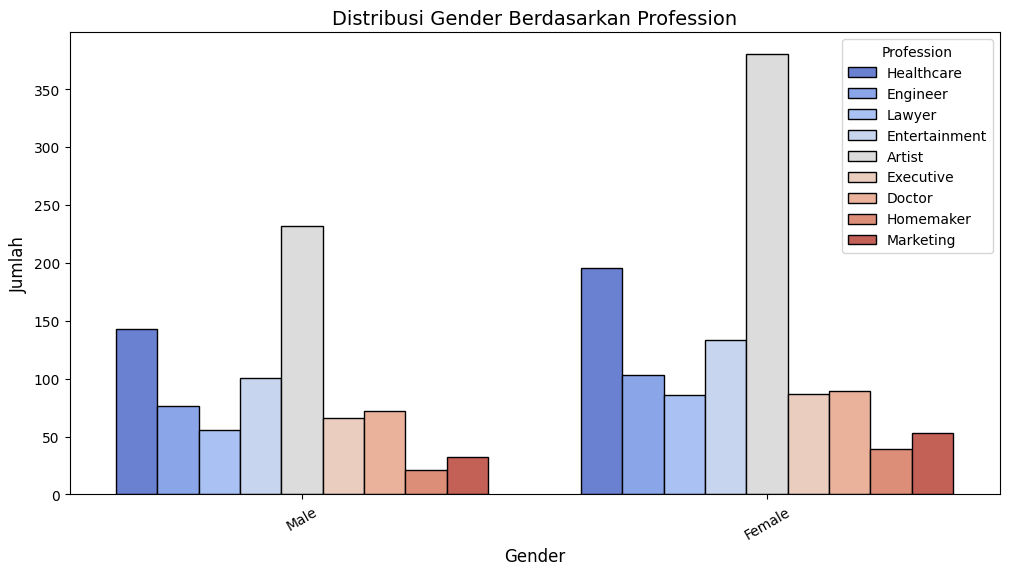

In [ ]:

# Boxplot Variabel Numerik terhadap Kategorikal
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=cat_col, y=num_col, data=df, palette='Spectral', showfliers=False)
        plt.title(f'Boxplot {num_col} Berdasarkan {cat_col}', fontsize=14)
        plt.xlabel(cat_col, fontsize=12)
        plt.ylabel(num_col, fontsize=12)
        plt.xticks(rotation=30)
        plt.show()

# Barplot dengan Hue untuk Variabel Kategorikal
for cat1 in categorical_cols:
    for cat2 in categorical_cols:
        if cat1 != cat2:
            plt.figure(figsize=(12, 6))
            sns.countplot(x=cat2, hue=cat1, data=df, palette='coolwarm', edgecolor='black')
            plt.title(f'Distribusi {cat2} Berdasarkan {cat1}', fontsize=14)
            plt.xlabel(cat2, fontsize=12)
            plt.ylabel('Jumlah', fontsize=12)
            plt.xticks(rotation=30)
            plt.legend(title=cat1, fontsize=10)
            plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
#Type your code here
display(df[df["Profession"].isna()])

df.dropna(subset=['Profession'], inplace=True)

df.info()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 138.2+ KB


In [ ]:
scaler = StandardScaler()
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Encoding kategorikal
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                1965 non-null   float64
 1   Age                       1965 non-null   float64
 2   Annual Income ($)         1965 non-null   float64
 3   Spending Score (1-100)    1965 non-null   float64
 4   Work Experience           1965 non-null   float64
 5   Family Size               1965 non-null   float64
 6   Gender_Male               1965 non-null   bool   
 7   Profession_Doctor         1965 non-null   bool   
 8   Profession_Engineer       1965 non-null   bool   
 9   Profession_Entertainment  1965 non-null   bool   
 10  Profession_Executive      1965 non-null   bool   
 11  Profession_Healthcare     1965 non-null   bool   
 12  Profession_Homemaker      1965 non-null   bool   
 13  Profession_Lawyer         1965 non-null   bool   
 14  Profession_Ma

In [ ]:
df.head()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Male,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,-1.728023,-1.052345,-2.086675,-0.431850,-0.787837,0.123358,True,False,False,False,False,True,False,False,False
1,-1.726294,-0.981941,-1.650205,1.069755,-0.278342,-0.384815,True,False,True,False,False,False,False,False,False
2,-1.724565,-1.017143,-0.537207,-1.611684,-0.787837,-1.401161,False,False,True,False,False,False,False,False,False
3,-1.722836,-0.911538,-1.126441,0.926745,-1.042584,-0.892988,False,False,False,False,False,False,False,True,False
4,-1.721107,-0.629924,-1.584734,-0.396098,-0.533089,1.139704,False,False,False,True,False,False,False,False,False


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numeric_features])

df['Cluster'].value_counts()

,count
Cluster,
0,761
1,675
2,529


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

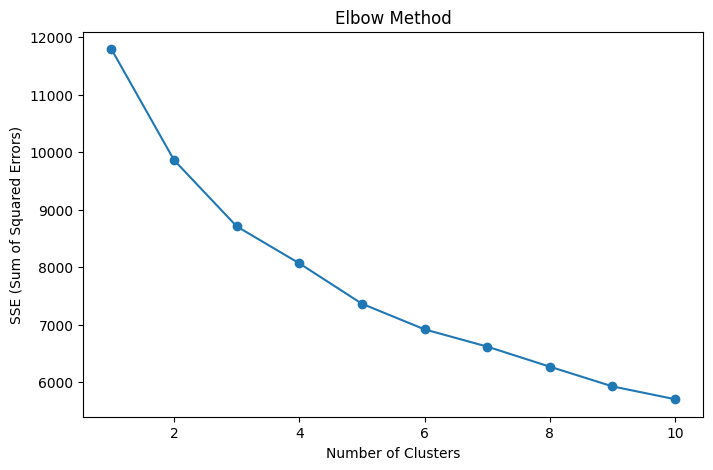

Silhouette Score for 2 clusters: 0.15854966648730903
Silhouette Score for 3 clusters: 0.15298168596049438
Silhouette Score for 4 clusters: 0.14132716985660593
Silhouette Score for 5 clusters: 0.1486333924089746
Silhouette Score for 6 clusters: 0.14694884427472338
Silhouette Score for 7 clusters: 0.1343533601817173
Silhouette Score for 8 clusters: 0.14184413353679376
Silhouette Score for 9 clusters: 0.1480714942633974
Silhouette Score for 10 clusters: 0.14985707279786364


In [ ]:
#Type your code here
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numeric_features])
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.show()

# Menghitung Silhouette Score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df[numeric_features])
    score = silhouette_score(df[numeric_features], labels)
    print(f'Silhouette Score for {k} clusters: {score}')

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

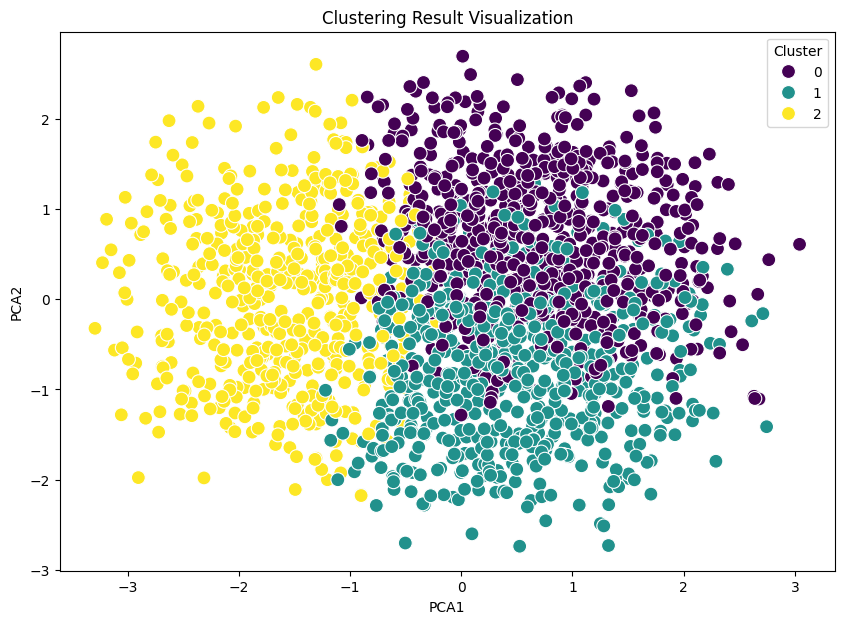

In [ ]:
#Type your code here
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df[numeric_features])
df['PCA1'] = reduced_data[:, 0]
df['PCA2'] = reduced_data[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering Result Visualization')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here
for cluster in df['Cluster'].unique():
    print(f"\nCluster {cluster}:")
    print(df[df['Cluster'] == cluster].describe())


Cluster 2:
       CustomerID         Age  Annual Income ($)  Spending Score (1-100)  \
count  529.000000  529.000000         529.000000              529.000000   
mean    -1.097281   -0.193728          -0.989707               -0.091627   
std      0.527065    0.775130           0.672594                1.005246   
min     -1.728023   -1.721179          -2.414027               -1.826199   
25%     -1.496308   -0.770731          -1.366500               -0.968138   
50%     -1.261135   -0.313108          -0.951853               -0.110078   
75%     -0.811539    0.320524          -0.537207                0.783735   
max      1.251417    1.763797           0.919620                1.749053   

       Work Experience  Family Size  Cluster        PCA1        PCA2  
count       529.000000   529.000000    529.0  529.000000  529.000000  
mean         -0.223444    -0.470311      2.0   -1.564158    0.047969  
std           0.924867     0.809564      0.0    0.666594    0.913878  
min          -1.042

Tulis hasil interpretasinya di sini.
# **1. Cluster 0:**
**Karakteristik Utama:**

*   Rata-rata umur dalam cluster ini lebih tinggi (mean = 0.951) dibandingkan cluster lainnya, menunjukkan bahwa kelompok ini terdiri dari pelanggan yang relatif lebih tua.
*   Pendapatan tahunan memiliki rata-rata positif (mean = 0.280), mengindikasikan bahwa kelompok ini cenderung memiliki pendapatan di atas rata-rata.
*   Spending Score memiliki rata-rata yang sangat dekat dengan nol (mean = -0.001), menunjukkan perilaku belanja yang rata-rata atau moderat.
*   Nilai PCA1 dan PCA2 menunjukkan bahwa cluster ini memiliki pola yang cenderung dominan di area tertentu dalam dimensi PCA.

**Interpretasi:**
*   Kelompok ini kemungkinan besar terdiri dari pelanggan yang sudah mapan secara finansial dan cenderung memiliki pola belanja yang stabil. Mereka bisa menjadi target untuk penawaran produk-produk premium atau eksklusif.

**analisis:**
Pelanggan lebih tua, pendapatan tinggi, dan belanja stabil. Cocok untuk produk premium.

# **2. Cluster 1:**
**Karakteristik Utama:**

*   Umur dalam cluster ini cenderung lebih muda (mean = -0.921).
*   Pendapatan tahunan memiliki rata-rata positif (mean = 0.459), menunjukkan bahwa mereka cenderung memiliki penghasilan yang relatif lebih tinggi.
*   Spending Score memiliki rata-rata positif kecil (mean = 0.073), mengindikasikan kelompok ini cenderung aktif dalam berbelanja, meskipun tidak berlebihan.

**Interpretasi:**
*  Kelompok ini kemungkinan besar terdiri dari pelanggan muda dengan daya beli yang baik. Mereka dapat ditargetkan untuk produk yang lebih trendi atau inovatif, serta promosi yang melibatkan diskon dan kampanye digital.

**analisis:**
Pelanggan muda, pendapatan cukup tinggi, dan aktif belanja. Cocok untuk produk trendi dan diskon.

# **3. Cluster 2:**
**Karakteristik Utama:**

*   Rata-rata umur cluster ini mendekati nol (mean = -0.194), menunjukkan kelompok ini memiliki distribusi umur yang beragam.
*   Pendapatan tahunan memiliki rata-rata negatif (mean = -0.990), menunjukkan bahwa kelompok ini terdiri dari pelanggan dengan pendapatan relatif rendah.
*   Spending Score juga mendekati nol (mean = -0.092), menunjukkan bahwa perilaku belanja mereka lebih konservatif.

**Interpretasi:**
*  Kelompok ini kemungkinan besar terdiri dari pelanggan dengan daya beli yang lebih rendah. Mereka dapat ditargetkan untuk promosi produk yang lebih terjangkau atau paket hemat. Strategi pemasaran perlu berfokus pada efisiensi harga dan manfaat langsung.

**analisis:**
Pelanggan dengan pendapatan rendah dan belanja hemat. Cocok untuk produk terjangkau dan paket hemat.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan hasil clustering ke dalam file CSV
output_file = "clustering.csv"
df.to_csv("/content/drive/MyDrive/dicoding_customer/" + output_file, index=False)

print(f"Hasil clustering telah disimpan ke dalam file: {output_file}")


Hasil clustering telah disimpan ke dalam file: clustering.csv
